# ACCESS Cryosphere Community Datapool (CCD)

This notebook provides a general introduction to the ACCESS Cryosphere Community Datapool (CCD) and its functionality. This notebook is designed to be executed on the [NCI _Gadi_ supercomputer](https://opus.nci.org.au/spaces/Help/pages/90308778/0.+Welcome+to+Gadi#id-0.WelcometoGadi-Overview).

In [1]:
import sys
import datapool as dp
import matplotlib.pyplot as plt
import numpy as np

## Initialise and interrogate the datatpool

In [2]:
# Initialise the datapool.
## NOTE: To build a catalog on your local machine, parse a custom YAML file to dp.catalog.DataCatalog(yaml_path = "<PATH_TO_YAML_FILE>").
catalog = dp.catalog.DataCatalog()


In [3]:
# List all datasets within the catalog.
## NOTE:  A raw pandas.DataFrame can be returned using catalog.datasets
catalog

,dataset,display_name,description,tags,version,subdataset,path,full_path,extension,skip_lines,no_data_value,ignore_dirs,ignore_files,loader,resolutions,static_patterns
0,measures_bedmachine_antarctica,BedMachine Antarctica,High-resolution bed topography and ice thickne...,"[antarctica, bed topography, ice thickness, su...",v1,None,/g/data/av17/access-nri/cryosphere-data-pool/e...,/g/data/av17/access-nri/cryosphere-data-pool/e...,nc,0,NaN,[],[],default,None,[]
1,measures_bedmachine_antarctica,BedMachine Antarctica,High-resolution bed topography and ice thickne...,"[antarctica, bed topography, ice thickness, su...",v2,None,/g/data/av17/access-nri/cryosphere-data-pool/e...,/g/data/av17/access-nri/cryosphere-data-pool/e...,nc,0,NaN,[],[],default,None,[]
2,measures_bedmachine_antarctica,BedMachine Antarctica,High-resolution bed topography and ice thickne...,"[antarctica, bed topography, ice thickness, su...",v3,None,/g/data/av17/access-nri/cryosphere-data-pool/e...,/g/data/av17/access-nri/cryosphere-data-pool/e...,nc,0,NaN,[],[],default,None,[]
3,bedmap,Bedmap,"Gridded, geospatial, and point datasets of Ant...","[antarctica, bed topography, ice thickness, su...",v1,geospatial,/g/data/av17/access-nri/cryosphere-data-pool/e...,/g/data/av17/access-nri/cryosphere-data-pool/e...,gpkg,0,-9999.0,[],[],default,None,[]
4,bedmap,Bedmap,"Gridded, geospatial, and point datasets of Ant...","[antarctica, bed topography, ice thickness, su...",v1,points,/g/data/av17/access-nri/cryosphere-data-pool/e...,/g/data/av17/access-nri/cryosphere-data-pool/e...,csv,18,-9999.0,[],[],default,None,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,measures_its_live_regional_glacier_and_ice_she...,ITS_LIVE Regional Glacier and Ice Sheet Surfac...,ITS_LIVE regional glacier and ice sheet surfac...,"[antarctica, greenland, ice velocity]",v2,RGI17A,/g/data/av17/access-nri/cryosphere-data-pool/i...,/g/data/av17/access-nri/cryosphere-data-pool/i...,nc,0,NaN,[],[],measures_velocity,None,[_2014-2022_]
61,measures_its_live_regional_glacier_and_ice_she...,ITS_LIVE Regional Glacier and Ice Sheet Surfac...,ITS_LIVE regional glacier and ice sheet surfac...,"[antarctica, greenland, ice velocity]",v2,RGI18A,/g/data/av17/access-nri/cryosphere-data-pool/i...,/g/data/av17/access-nri/cryosphere-data-pool/i...,nc,0,NaN,[],[],measures_velocity,None,[_2014-2022_]
62,measures_its_live_regional_glacier_and_ice_she...,ITS_LIVE Regional Glacier and Ice Sheet Surfac...,ITS_LIVE regional glacier and ice sheet surfac...,"[antarctica, greenland, ice velocity]",v2,RGI19A,/g/data/av17/access-nri/cryosphere-data-pool/i...,/g/data/av17/access-nri/cryosphere-data-pool/i...,nc,0,NaN,[],[],measures_velocity,None,[_2014-2022_]
63,racmo2.3p2_monthly_27km_1979-2022,RACMO2.3p2 Monthly Surface Mass Balance and Cl...,Regional Atmospheric Climate Model (RACMO) ver...,"[antarctica, surface mass balance, climate dat...",v1,None,/g/data/av17/access-nri/cryosphere-data-pool/s...,/g/data/av17/access-nri/cryosphere-data-pool/s...,nc,0,NaN,[],"[Height_latlon_ANT27.nc, TotIS_RACMO_ANT27_IMB...",racmo,None,[]


Various functions exist to allow users to interrogate the data catalog:
- `search()` - Search the data pool for a given key word. This searches the `dataset`, `display_name`, and `tags` fields.
- `help()` - Retrieve a summary of dataset-specific information for a given dataset.
- `available_versions()` - Retrieve a list of available versions for a given dataset.
- `available_subdatasets()` - Retrieve a list of available subdataets for a given dataset.
- `available_resolutions()` - Retrieve a list of available resolutions for a given dataset.

In [4]:
# Search the catalog based on display_name, tags, or dataset_name. Here, explore bedmachine datasets
catalog.search('racmo')

,dataset,display_name,description,tags,version,subdataset,path,full_path,extension,skip_lines,no_data_value,ignore_dirs,ignore_files,loader,resolutions,static_patterns
0,racmo2.3p2_monthly_27km_1979-2022,RACMO2.3p2 Monthly Surface Mass Balance and Cl...,Regional Atmospheric Climate Model (RACMO) ver...,"[antarctica, surface mass balance, climate dat...",v1,None,/g/data/av17/access-nri/cryosphere-data-pool/s...,/g/data/av17/access-nri/cryosphere-data-pool/s...,nc,0,NaN,[],"[Height_latlon_ANT27.nc, TotIS_RACMO_ANT27_IMB...",racmo,None,[]
1,racmo2.4p1_monthly_11km_1979-2023,RACMO2.4p1 Monthly Surface Mass Balance and Cl...,Regional Atmospheric Climate Model (RACMO) ver...,"[antarctica, surface mass balance, climate dat...",v1,None,/g/data/av17/access-nri/cryosphere-data-pool/s...,/g/data/av17/access-nri/cryosphere-data-pool/s...,nc,0,NaN,[],[ANT11_masks.nc],racmo,None,[]


In [5]:
# The help() function provides a full overview of a given dataset
catalog.help('measures_its_live_regional_glacier_and_ice_sheet_surface_velocities')

Dataset: measures_its_live_regional_glacier_and_ice_sheet_surface_velocities

Available versions:
  - v1
  - v2

Tip:
  Use catalog.help(dataset=..., version=...) for more details.


In [6]:
# Version-specific information about a given dataset can be obtained by specifying a given version
catalog.help('measures_its_live_regional_glacier_and_ice_sheet_surface_velocities', version = 'v1')

Dataset: measures_its_live_regional_glacier_and_ice_sheet_surface_velocities

Available versions:
  - v1
  - v2

Version: v1

Available subdatasets:
  - ALA
  - ANT
  - CAN
  - GRE
  - HMA
  - ICE
  - PAT
  - SRA

Supported catalog keywords:
  - subdataset : yes
  - resolution : yes
  - static  : yes

Example usage:
  catalog.load_dataset('measures_its_live_regional_glacier_and_ice_sheet_surface_velocities', version = 'v1', subdataset = '...', resolution = '...', static = True)


In [7]:
# Find versions of a given dataset
catalog.available_versions('racmo2.3p2_monthly_27km_1979-2022')

['v1']

In [8]:
# Find available subdatasets for bedmap. By default, the latest version is used.
catalog.available_subdatasets('bedmap')

['geospatial', 'points', 'gridded']

In [9]:
# Get available resolutions for a gievn dataset/version/subdataset. If not specified, the latest version is used.
catalog.available_resolutions('measures_its_live_regional_glacier_and_ice_sheet_surface_velocities', version = 'v1', subdataset = 'ALA')

{'annual': {'120m': 'G0120', '240m': 'G0240'},
 'static': {'120m': 'G0120', '240m': 'G0240'}}

## Loading Datasets

To load a dataset, we use the `load_dataset` function. This accepts various keyword arguments, depending on the dataset. At a minimum it requires `dataset_name` and `version` arguments.

Other arguments include:
- `subdataset` [str]- this is the name of the subdataset to be loaded
- `resolution` [str] - this is the requested resolution to be loaded. Currently only supported for `measures_its_live_regional_glacier_and_ice_sheet_surface_velocities`
- `composite` [bool] - should the composite file be loaded, or the annual series. Default = False

In [10]:
# Load a simple dataset
bedmachine_v1 = catalog.load_dataset('measures_bedmachine_antarctica', version = 'v1')
bedmachine_v1

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.12/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml


<xarray.Dataset> Size: 4GB
Dimensions:    (y: 13333, x: 13333)
Coordinates:
  * y          (y) int32 53kB 3333000 3332500 3332000 ... -3332500 -3333000
  * x          (x) int32 53kB -3333000 -3332500 -3332000 ... 3332500 3333000
Data variables:
    mapping    |S1 1B ...
    mask       (y, x) int8 178MB dask.array<chunksize=(1905, 1905), meta=np.ndarray>
    firn       (y, x) float32 711MB dask.array<chunksize=(953, 953), meta=np.ndarray>
    surface    (y, x) float32 711MB dask.array<chunksize=(953, 953), meta=np.ndarray>
    thickness  (y, x) float32 711MB dask.array<chunksize=(953, 953), meta=np.ndarray>
    bed        (y, x) float32 711MB dask.array<chunksize=(953, 953), meta=np.ndarray>
    errbed     (y, x) float32 711MB dask.array<chunksize=(1334, 1334), meta=np.ndarray>
    source     (y, x) int8 178MB dask.array<chunksize=(1905, 1905), meta=np.ndarray>
    geoid      (y, x) int16 356MB dask.array<chunksize=(1334, 1334), meta=np.ndarray>
Attributes: (12/17)
    Conventions:                 CF-1.7
    Title:                       BedMachine Antarctica
    Author:                      Mathieu Morlighem
    version:                     05-Nov-2019 (v1.38)
    nx:                          13333.0
    ny:                          13333.0
    ...                          ...
    ymax:                        3333000
    spacing:                     500
    no_data:                     -9999.0
    license:                     No restrictions on access or use
    Data_citation:               Morlighem M. et al., (2019), Deep glacial tr...
    Notes:                       Data processed at the Department of Earth Sy...

In [11]:
# Load a specific subdataset. The 'type' returned depends on the dataset.
measures_basins_imbie = catalog.load_dataset('measures_antarctic_boundaries', version = 'v2', subdataset = 'basins_imbie')
measures_basins_imbie

,NAME,Regions,Subregions,TYPE,geometry
0,NaN,Islands,NaN,IS,"MULTIPOLYGON (((-217776.532 2130382.522, -2168..."
1,A-Ap,East,A-Ap,GR,"POLYGON ((1233919.752 1935020.761, 1237354.55 ..."
2,Ap-B,East,Ap-B,GR,"POLYGON ((1267480.529 1935993.733, 1261072.64 ..."
3,B-C,East,B-C,GR,"POLYGON ((1672255.018 -94566.965, 1625433.485 ..."
4,C-Cp,East,C-Cp,GR,"POLYGON ((2594276.532 -575938.016, 2594114.248..."
5,Cp-D,East,Cp-D,GR,"POLYGON ((2317315.872 -603916.511, 2321147.611..."
6,D-Dp,East,D-Dp,GR,"POLYGON ((1419962.788 -1124912.594, 1435793.14..."
7,Dp-E,East,Dp-E,GR,"POLYGON ((458049.88 -1586925.021, 458790.209 -..."
8,E-Ep,East,E-Ep,GR,"POLYGON ((385888.335 -1128116.87, 385900.076 -..."
9,Ep-F,West,Ep-F,GR,"POLYGON ((-578695.182 -1285897.642, -578945.60..."


<Axes: xlabel='Cartesian x-coordinate [meter]', ylabel='Cartesian y-coordinate [meter]'>

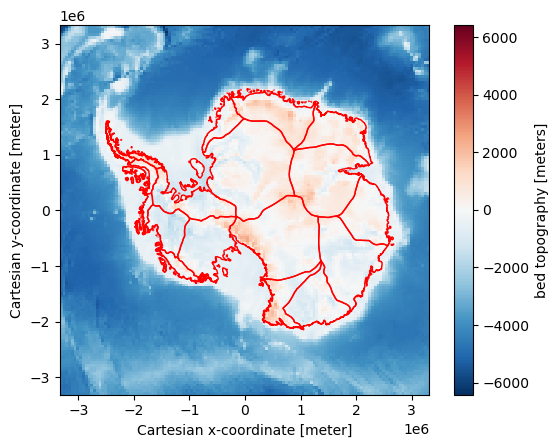

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.12/lib/python3.11/site-packages/dask/_task_spec.py:758: FutureWarning: In a future version, xarray will not decode the variable 'date' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  return self.func(*new_argspec, **kwargs)
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.12/lib/python3.11/site-packages/dask/_task_spec.py:758: FutureWarning: In a future version, xarray will not decode the variable 'dt' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead 

In [12]:
# Construct a simple figure

# Coarsen bed topogrpahy for improved render time
bed = bedmachine_v1.bed.coarsen(x = 100, y = 100, boundary = 'trim').mean()

# Plot bed topography
fig, ax = plt.subplots()
bed.plot(ax=ax)

# Add grounding line
measures_basins_imbie.plot(ax = ax, edgecolor = 'red', facecolor = 'none')

In [13]:
# Load composite velocity data
vel_data = catalog.load_dataset('measures_its_live_regional_glacier_and_ice_sheet_surface_velocities', version = 'v1', subdataset = 'ANT', resolution = '240m', static = True)
vel_data

<xarray.Dataset> Size: 25GB
Dimensions:        (y: 18392, x: 22896)
Coordinates:
  * y              (y) float64 147kB 2.26e+06 2.259e+06 ... -2.154e+06
  * x              (x) float64 183kB -2.678e+06 -2.678e+06 ... 2.817e+06
Data variables: (12/14)
    chip_size_max  (y, x) float32 2GB dask.array<chunksize=(144, 358), meta=np.ndarray>
    count          (y, x) float32 2GB dask.array<chunksize=(144, 358), meta=np.ndarray>
    date           (y, x) timedelta64[ns] 3GB dask.array<chunksize=(144, 358), meta=np.ndarray>
    dt             (y, x) timedelta64[ns] 3GB dask.array<chunksize=(144, 358), meta=np.ndarray>
    ice            (y, x) float32 2GB dask.array<chunksize=(288, 358), meta=np.ndarray>
    mapping        float32 4B ...
    ...             ...
    v              (y, x) float32 2GB dask.array<chunksize=(144, 358), meta=np.ndarray>
    v_err          (y, x) float32 2GB dask.array<chunksize=(144, 358), meta=np.ndarray>
    vx             (y, x) float32 2GB dask.array<chunksize=(144, 358), meta=np.ndarray>
    vx_err         (y, x) float32 2GB dask.array<chunksize=(144, 358), meta=np.ndarray>
    vy             (y, x) float32 2GB dask.array<chunksize=(144, 358), meta=np.ndarray>
    vy_err         (y, x) float32 2GB dask.array<chunksize=(144, 358), meta=np.ndarray>
Attributes:
    Conventions:              CF-1.8
    GDAL_AREA_OR_POINT:       Area
    author:                   Alex S. Gardner, JPL/NASA
    date_created:             05-May-2019 15:53:24
    institution:              NASA Jet Propulsion Laboratory (JPL), Californi...
    motion_coordinates:       map
    motion_detection_method:  feature
    scene_pair_type:          optical
    title:                    autoRIFT surface velocities